In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD


In [2]:
def normalize(images):
	images = [[j.astype(float)/255. for j in i] for i in images]
	return np.asarray(images)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
#assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
#assert(x_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
#assert(x_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [4]:

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#Normalizing data. 
x_train = normalize(x_train)
x_test = normalize(x_test)

classes = np.unique(y_train)
num_classes = classes.size

#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

print(x_train.shape,x_test.shape)

x_train = np.asarray([i.flatten() for i in x_train])
x_test = np.asarray([i.flatten() for i in x_test])
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(60000, 784) (10000, 784)
(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [44]:
#begin creating hidden layers. Activation fuction is relu for optimum performance

#Question 3: 32 nearuons, 2 hidden layers
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 1.1804 - accuracy: 0.6668 - val_loss: 0.5019 - val_accuracy: 0.8634
Epoch 2/20
60000/60000 - 2s - loss: 0.4248 - accuracy: 0.8822 - val_loss: 0.3559 - val_accuracy: 0.9014
Epoch 3/20
60000/60000 - 2s - loss: 0.3403 - accuracy: 0.9031 - val_loss: 0.3059 - val_accuracy: 0.9112
Epoch 4/20
60000/

Text(0.5, 1.0, 'Loss vs Epoch (32 neurons - 2 hidden layers)')

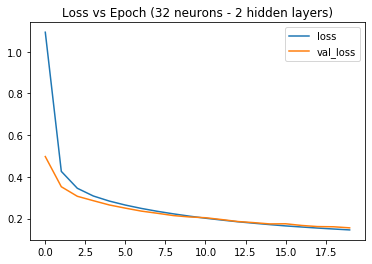

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss vs Epoch (32 neurons - 2 hidden layers)')

Text(0.5, 1.0, 'Accuracy vs Epoch (32 neurons - 2 hidden layers)')

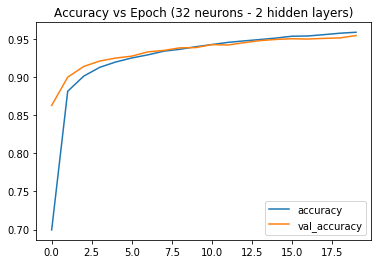

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (32 neurons - 2 hidden layers)')

In [103]:
#Question 4: 64 nearuons, 2 hidden layers

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))



Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_137 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_138 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 4s - loss: 0.9428 - accuracy: 0.7553 - val_loss: 0.4235 - val_accuracy: 0.8841
Epoch 2/20
60000/60000 - 3s - loss: 0.3797 - accuracy: 0.8948 - val_loss: 0.3253 - val_accuracy: 0.9080
Epoch 3/20
60000/60000 - 3s - loss: 0.3183 - accuracy: 0.9092 - val_loss: 0.2881 - val_accuracy: 0.9169
Epoch 4/20
60000/

Text(0.5, 1.0, 'Loss vs Epoch (64 neurons - 2 hidden layers)')

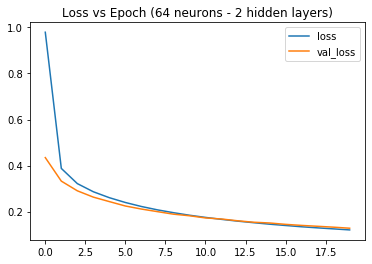

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss vs Epoch (64 neurons - 2 hidden layers)')

Text(0.5, 1.0, 'Accuracy vs Epoch (100 neurons - 2 hidden layers)')

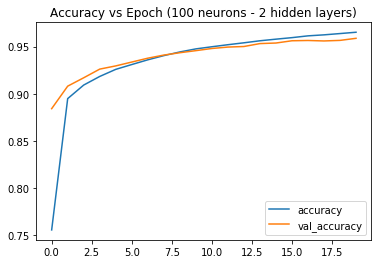

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (100 neurons - 2 hidden layers)')

In [47]:
#Question 5: SGD optimizer - learn rate=0.01, decay rate = 0.000001, momentum rate = 0.9

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01,decay=1e-6,momentum=0.9),metrics=['accuracy'])

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 0.4445 - accuracy: 0.8683 - val_loss: 0.2601 - val_accuracy: 0.9207
Epoch 2/20
60000/60000 - 2s - loss: 0.2070 - accuracy: 0.9399 - val_loss: 0.1799 - val_accuracy: 0.9469
Epoch 3/20
60000/60000 - 3s - loss: 0.1571 - accuracy: 0.9536 - val_loss: 0.1420 - val_accuracy: 0.9568
Epoch 4/20
60000/

Text(0.5, 1.0, 'Loss vs Epoch (SGD w/ momentum = 0.9)')

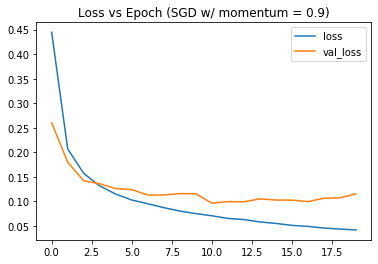

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss vs Epoch (SGD w/ momentum = 0.9)')

Text(0.5, 1.0, 'Accuracy vs Epoch (SGD w/ momentum = 0.9)')

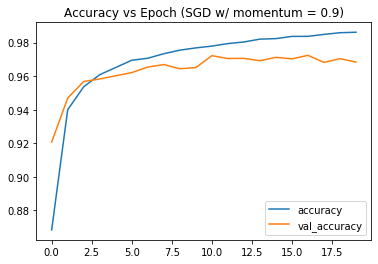

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (SGD w/ momentum = 0.9)')

In [73]:
#Question 6: Batch Size of 128 & 32

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 2s - loss: 1.6416 - accuracy: 0.5113 - val_loss: 0.9147 - val_accuracy: 0.7909
Epoch 2/20
60000/60000 - 1s - loss: 0.6675 - accuracy: 0.8314 - val_loss: 0.4935 - val_accuracy: 0.8728
Epoch 3/20
60000/60000 - 1s - loss: 0.4592 - accuracy: 0.8736 - val_loss: 0.3986 - val_accuracy: 0.8919
Epoch 4/20
60000/

Text(0.5, 1.0, 'Loss vs Epoch (batch size 128)')

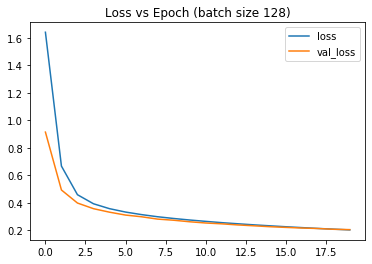

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss vs Epoch (batch size 128)')

Text(0.5, 1.0, 'Accuracy vs Epoch (batch size 128)')

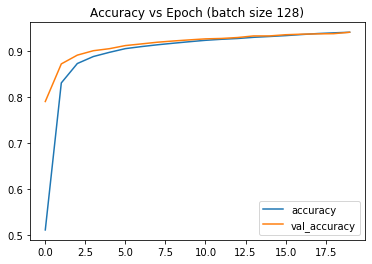

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (batch size 128)')

Text(0.5, 1.0, 'Accuracy vs Epoch (batch size 32)')

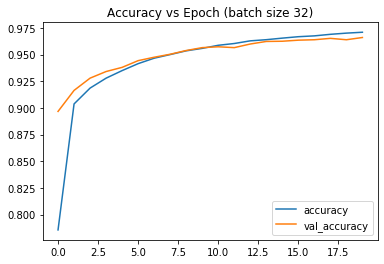

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (batch size 32)')

In [76]:
#Question 7: Adding another hidden layer

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 1.3937 - accuracy: 0.5694 - val_loss: 0.5406 - val_accuracy: 0.8407
Epoch 2/20
60000/60000 - 3s - loss: 0.4423 - accuracy: 0.8701 - val_loss: 0.3620 - val_accura

Text(0.5, 1.0, 'Accuracy vs Epoch (3 hidden layers)')

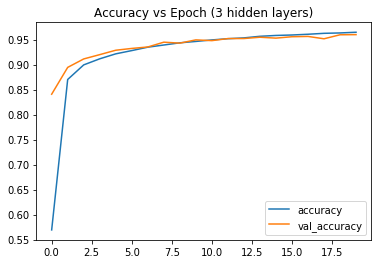

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (3 hidden layers)')

In [81]:
#Question 8: Adding dropout layers

model = Sequential()
model.add(Dropout(0.1,input_shape=x_train[0].shape))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________

Text(0.5, 1.0, 'Accuracy vs Epoch (2 layers w/ dropout = 0.5)')

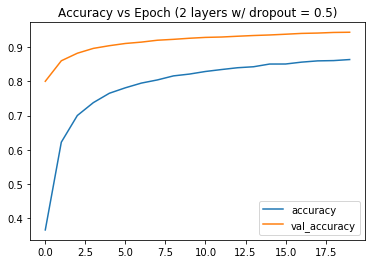

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (2 layers w/ dropout = 0.5)')

Text(0.5, 1.0, 'Accuracy vs Epoch (2 layers w/ dropout = 0.1)')

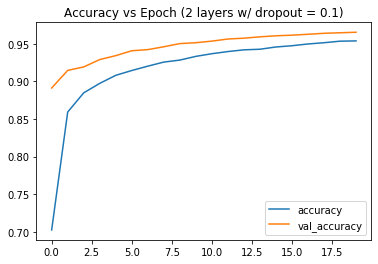

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (2 layers w/ dropout = 0.1)')

In [101]:
#Question 9: Attempting to build optimal network based on previous results
# 2 layers, 150 neurons, dropout = 0.1, momentum = 0.2, batch size = 20

model = Sequential()
model.add(Dropout(0.1,input_shape=x_train[0].shape))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01,decay=1e-6,momentum=0.2),metrics=['accuracy'])

batch_size = 20
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=2,
                    validation_data=(x_test, y_test))


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_42 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 150)               117750    
_________________________________________________________________
dropout_43 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_44 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 10)                1510      
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_______________________________________________

Text(0.5, 1.0, 'Accuracy vs Epoch (Optimal Network)')

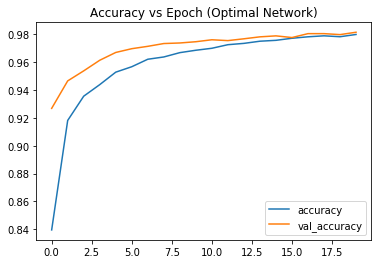

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy vs Epoch (Optimal Network)')